# Ejercicio de programación Regresión Lineal Multiple

In [99]:
##JOSE IGANCIO DURAN DAZA
#https://github.com/N4CH0000/SIS420INTELIGENCIAARTIFICAIL1
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd 

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [100]:
#Abrir el dataset 
data = pd.read_csv('ParisHousingClass.csv', delimiter=',')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,1
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,2


In [101]:
# Cargar datos
data = pd.read_csv(os.path.join('ParisHousingClass.csv'),delimiter=',')
X, y = data.iloc[:, :17], data.iloc[:, 1]
m = y.size  # m = numero de ejemplos de entrenamiento


In [102]:
data.corr()["squareMeters"]

squareMeters         1.000000
numberOfRooms        0.009573
hasYard             -0.006650
hasPool             -0.005594
floors               0.001109
cityCode            -0.001541
cityPartRange        0.008758
numPrevOwners        0.016619
made                -0.007207
isNewBuilt          -0.010667
hasStormProtector    0.007480
basement            -0.003960
attic               -0.000588
garage              -0.017246
hasStorageRoom      -0.003486
hasGuestRoom        -0.000623
price                0.999999
category            -0.011800
Name: squareMeters, dtype: float64

In [103]:
#Normalizacion 
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [104]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [105]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [106]:
for i in range(7):
    print(X)

[[ 1.          0.89156241 -1.64351831 ... -1.00601811  0.63137326
   0.89168721]
 [ 1.          1.07395603 -0.39418009 ...  0.99401789 -0.9428096
   1.07481431]
 [ 1.          0.20303346  0.26519286 ...  0.99401789  1.26104641
   0.20199443]
 ...
 [ 1.          1.18065352 -1.64351831 ...  0.99401789  1.26104641
   1.18048389]
 [ 1.          0.31855868  0.68163893 ...  0.99401789 -0.31313646
   0.31684765]
 [ 1.         -1.68318347  1.16749268 ...  0.99401789  0.31653669
  -1.6844863 ]]
[[ 1.          0.89156241 -1.64351831 ... -1.00601811  0.63137326
   0.89168721]
 [ 1.          1.07395603 -0.39418009 ...  0.99401789 -0.9428096
   1.07481431]
 [ 1.          0.20303346  0.26519286 ...  0.99401789  1.26104641
   0.20199443]
 ...
 [ 1.          1.18065352 -1.64351831 ...  0.99401789  1.26104641
   1.18048389]
 [ 1.          0.31855868  0.68163893 ...  0.99401789 -0.31313646
   0.31684765]
 [ 1.         -1.68318347  1.16749268 ...  0.99401789  0.31653669
  -1.6844863 ]]
[[ 1.          0.8

In [107]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [108]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 5.03583999e+01 -3.63076807e-05  2.88152554e+01 -3.95512558e-08
  3.75535941e-09  3.16967033e-09  1.19792931e-08  1.60082015e-09
  1.99368593e-08 -4.64778890e-09 -6.02079960e-09 -4.03383493e-09
 -2.22188927e-08  1.47831167e-08  2.28744570e-08 -2.11058912e-08
 -8.58509944e-09  3.63085135e-05]
El precio predecido para una casa de 75523 metros (metros cuadrados) con 3 habitaciones y con 63 plantas, un 3 rango de la ciudad, 8 propietarios anteriores tiene protectore de tormentas(usando el descenso por el gradiente): $3


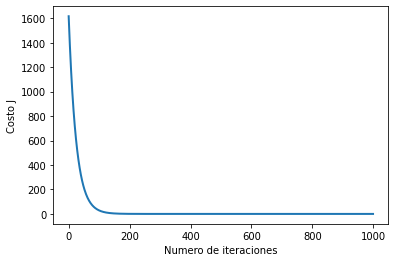

In [109]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.02
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(18)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 75523 metros (metros cuadrados) con 3 habitaciones y con 63 plantas, un 3 rango de la ciudad, 8 propietarios anteriores
# tiene protectore de tormentas
X_array = [1,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5]
X_array[1:18] = (X_array[1:18] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 75523 metros (metros cuadrados) con 3 habitaciones y con 63 plantas, un 3 rango de la ciudad, 8 propietarios anteriores tiene protectore de tormentas(usando el descenso por el gradiente): ${:.0f}'.format(price))

In [110]:
# Cargar datos
data = pd.read_csv('ParisHousingClass.csv', delimiter=',')
X = data.iloc[:, :17]
y = data.iloc[:, 16]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [111]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [98]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar el precio para una casa de superficie 78823 metros (metros cuadrados) con 4 habitaciones y con 50 plantas, un 3 rango de la ciudad, 6 propietarios anteriores
# tiene protectore de tormentas

X_array = [1, 78823,4,0,1,50,9373,3,6,2005,0,1,4313,9005,956,0,7,567465]
price = np.dot(X_array, theta) 

print('El precio predecido para una casa de superficie 78823 metros (metros cuadrados) con 4 habitaciones y con 50 plantas, un 3 rango de la ciudad, 8 propietarios anteriores, tiene protectore de tormentas (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 3.91461216e-02 -1.36780272e-07  6.65615971e-08 -4.91194660e-05
 -1.56152382e-05 -2.75152729e-07  1.31556988e-11  1.29312821e-06
 -2.52526661e-07 -1.73685676e-05 -8.69164069e-06 -2.35918560e-06
 -8.47523829e-10  3.27602834e-10 -2.80631340e-09 -3.99035707e-06
 -6.59010766e-07  1.00000000e+00]
El precio predecido para una casa de superficie 78823 metros (metros cuadrados) con 4 habitaciones y con 50 plantas, un 3 rango de la ciudad, 8 propietarios anteriores, tiene protectore de tormentas (usando la ecuación de la normal): $567465
